In [2]:
pip show elasticsearch

Name: elasticsearch
Version: 7.6.0
Summary: Python client for Elasticsearch
Home-page: https://github.com/elastic/elasticsearch-py
Author: Honza Král, Nick Lang
Author-email: honza.kral@gmail.com, nick@nicklang.com
License: Apache-2.0
Location: c:\users\mehta\anaconda3\envs\py37\lib\site-packages
Requires: urllib3
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
from elasticsearch import Elasticsearch

In [4]:
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

In [5]:
es.info()

{'name': 'DESKTOP-Q5T87SF',
 'cluster_name': 'elasticsearch',
 'cluster_uuid': 'muA08ndyRfWSDgYcA-aCaQ',
 'version': {'number': '7.6.2',
  'build_flavor': 'default',
  'build_type': 'zip',
  'build_hash': 'ef48eb35cf30adf4db14086e8aabd07ef6fb113f',
  'build_date': '2020-03-26T06:34:37.794943Z',
  'build_snapshot': False,
  'lucene_version': '8.4.0',
  'minimum_wire_compatibility_version': '6.8.0',
  'minimum_index_compatibility_version': '6.0.0-beta1'},
 'tagline': 'You Know, for Search'}

In [6]:
!python --version

Python 3.7.16


In [7]:
import pyspark
print(pyspark.__version__)

2.4.5


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("Amazon Proucts Recommender") \
        .config("spark.driver.extraClassPath", "C:/Users/MEHTA/Desktop/Recommend_System/elasticsearch-hadoop-7.6.2/dist/elasticsearch-spark-20_2.11-7.6.2.jar") \
        .config("spark.executor.extraClassPath", "C:/Users/MEHTA/Desktop/Recommend_System/elasticsearch-hadoop-7.6.2/dist/elasticsearch-spark-20_2.11-7.6.2.jar") \
        .config("spark.es.nodes", "localhost") \
        .config("spark.es.port", "9200") \
        .config("spark.es.nodes.wan.only", "true") \
        .getOrCreate()



In [10]:
from IPython.display import Image, HTML, display
spark

In [13]:
pip install pandas

     ---------------------------------------- 10.0/10.0 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import gzip
import json
from pyspark.sql.types import *


def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

        
def getMetaData(path):
    data = []
    data_schema =  [
                       StructField("asin", StringType(), True),
                       StructField("title", StringType(), True),
                       StructField("brand", StringType(), True),
                       StructField("category", ArrayType(StringType(), True), True),
                       StructField("main_category", StringType(), True),
                       StructField("image", ArrayType(StringType(), True), True)
                   ]
    final_schema = StructType(fields=data_schema)
    for d in parse(path):
        review = {}
        review['asin'] = d['asin']
        review['title'] = d['title']
        review['brand'] = d['brand']
        review['category'] = d['category']
#         print(d['category'])
        review['main_category'] = next(reversed(d['category']), None) if len(d['category'])!= 0 else ''
        if 'image' in d:
          review['image'] = d['image']
        else:
          review['image'] = None
        
        data.append(review)

    return spark.createDataFrame(data, schema=final_schema)

product_data = getMetaData('C:/Users/MEHTA/Desktop/Recommend_System/meta_Appliances.json.gz')
product_data = product_data.dropDuplicates(['asin'])
product_data.limit(1).toPandas()


,asin,title,brand,category,main_category,image
0,B000BEZV7M,Extech RH401 Triple Display Hygro Thermometer ...,Extech,"[Appliances, Parts & Accessories, Humidifier P...",Humidity Meters,None


In [9]:
product_data.groupBy("main_category").count().orderBy(col('count').desc()).show(100)

+--------------------+-----+
|       main_category|count|
+--------------------+-----+
| Parts & Accessories| 4513|
|Refrigerator Part...| 3733|
|Washer Parts & Ac...| 2270|
|Dishwasher Parts ...| 1790|
|Range Parts & Acc...| 1710|
|       Water Filters| 1572|
|   Replacement Parts| 1556|
|Cooktop Parts & A...| 1171|
|         Range Hoods|  951|
|Humidifier Parts ...|  887|
|                    |  805|
|       Refrigerators|  722|
|Oven Parts & Acce...|  645|
|          Ice Makers|  453|
|            Cooktops|  436|
| Freestanding Ranges|  412|
|               Knobs|  406|
|Freezer Parts & A...|  360|
|Built-In Dishwashers|  357|
|         Accessories|  341|
|             Washers|  302|
|                Bins|  273|
|              Dryers|  253|
|               Vents|  243|
|Dryer Parts & Acc...|  235|
|              Motors|  224|
|             Filters|  213|
|     Humidity Meters|  185|
|   Replacement Wicks|  177|
|Refrigerators, Fr...|  175|
|Ranges, Ovens & C...|  169|
|Range Hood Pa

In [52]:
import json
import gzip
import pandas as pd

data = []
with gzip.open('C:/Users/MEHTA/Desktop/Recommend_System/meta_Appliances.json.gz') as f:
    for line in f:
        data.append(json.loads(line.strip()))

df = pd.DataFrame.from_dict(data)

print("Number of rows: ", len(df))
print("Number of columns: ", len(df.columns))

print(df.head())

print(df.dtypes)

Number of rows:  30445
Number of columns:  19
                                            category  \
0  [Appliances, Refrigerators, Freezers & Ice Mak...   
1  [Appliances, Refrigerators, Freezers & Ice Mak...   
2              [Appliances, Parts &amp; Accessories]   
3                  [Appliances, Parts & Accessories]   
4  [Appliances, Parts & Accessories, Range Parts ...   

                                               tech1  \
0   class="a-keyvalue prodDetTable" role="present...   
1   class="a-keyvalue prodDetTable" role="present...   
2                                                      
3   class="a-keyvalue prodDetTable" role="present...   
4   class="a-keyvalue prodDetTable" role="present...   

                                         description fit  \
0                                                 []       
1  [2 X Tupperware Pure & Fresh Unique Covered Co...       
2                                                 []       
3  [Multi purpost descaler, especially s

In [13]:
df.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')

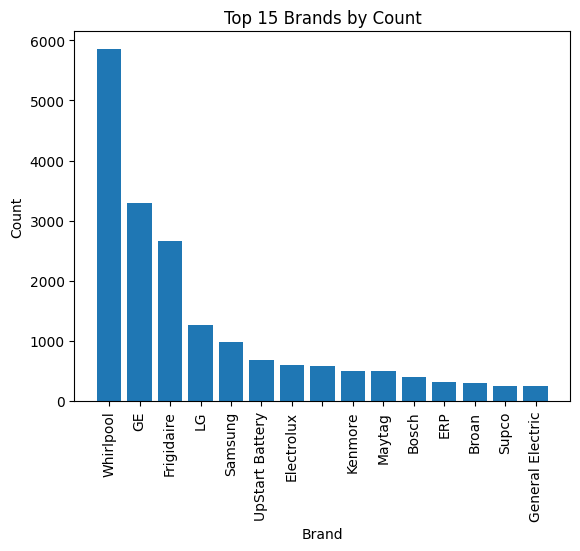

In [17]:
import matplotlib.pyplot as plt

brand_counts = df['brand'].value_counts().nlargest(15)
plt.bar(brand_counts.index, brand_counts.values)
plt.xticks(rotation=90)
plt.title("Top 15 Brands by Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


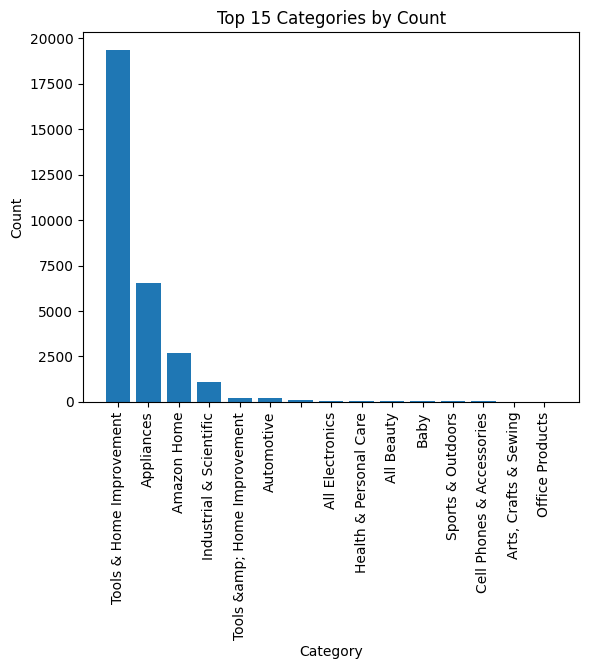

In [18]:
import matplotlib.pyplot as plt

category_counts = df['main_cat'].value_counts().nlargest(15)
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.title("Top 15 Categories by Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


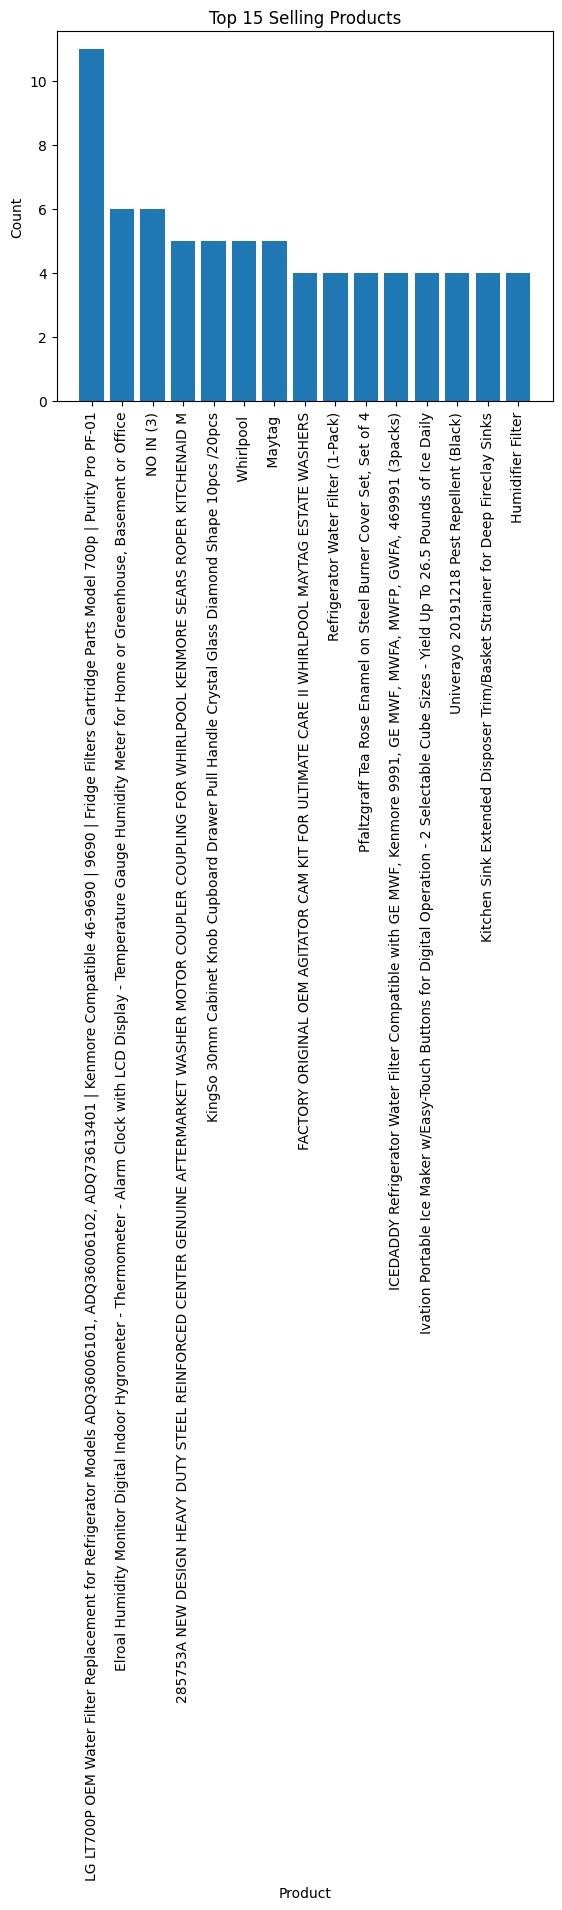

In [19]:
import matplotlib.pyplot as plt

product_counts = df.groupby('title')['asin'].count().sort_values(ascending=False)[:15]
plt.bar(product_counts.index, product_counts.values)
plt.xticks(rotation=90)
plt.title("Top 15 Selling Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

In [46]:
from collections import Counter

features = []
for f in df['feature']:
    if isinstance(f, list):
        features.extend(f)
        
feature_counts = Counter(features)
top_features = feature_counts.most_common(10)
print(top_features)

[('Genuine Replacement Part', 2530), ('This is an O.E.M. Authorized part', 2286), ('This is a genuine replacement part', 1323), ('Genuine OEM replacement part', 1037), ('Use genuine OEM parts for safety reliability and performance', 939), ('Frigidaire item', 783), ('General Electric (GENF0)', 756), ('Frigidaire (FRIGB)', 709), ('Whirlpool (WHIRA)', 635), ('All Our Parts Are Factory Approved For A Proper Fit', 588)]


In [48]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(df['brand'], df['main_cat'])
chi2, p, dof, expected = chi2_contingency(observed)

print('Test Statistic:', chi2)
print('p-value:', p)

if p > 0.05:
    print('There is likely no significant relationship between brand and main category')
else:
    print('There is likely a significant relationship between brand and main category')


Test Statistic: 360748.2302983758
p-value: 0.0
There is likely a significant relationship between brand and main category.


In [50]:
from scipy.stats import ttest_ind

stainless_prices = df[df['title'].str.contains('stainless', case=False)]['price'].dropna()
non_stainless_prices = df[~df['title'].str.contains('stainless', case=False)]['price'].dropna()

t, p = ttest_ind(stainless_prices, non_stainless_prices, equal_var=False)

print('Test Statistic:', t)
print('p-value:', p)

if p > 0.05:
    print('There is likely no significant difference in the mean price of stainless and non-stainless products.')
else:
    print('There is likely a significant difference in the mean price of stainless and non-stainless products.')



Test Statistic: 11.186787062528738
p-value: 1.0546783319141377e-26
There is likely a significant difference in the mean price of stainless and non-stainless products.


In [42]:
pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Create a linear model for price vs. brand
model = ols('price ~ brand', data=df).fit()

anova_results = anova_lm(model)
print(anova_results)

               df        sum_sq       mean_sq         F  PR(>F)
brand      2761.0  3.446344e+07  12482.232524  3.156577     0.0
Residual  18228.0  7.208001e+07   3954.356745       NaN     NaN


In [16]:
VECTOR_DIM = 25

product_mapping = {
    # this mapping definition sets up the metadata fields for the products
    "mappings": {
        "properties": {
            "asin": {
                "type": "keyword"
            },
            "title": {
                "type": "keyword"
            },
            "image": {
                "type": "keyword"
            },
            "brand": {
                "type": "keyword"
            },
            "category": {
                "type": "keyword"
            },
            "main_category": {
                "type": "keyword"
            },
            # the following fields define our model factor vectors and metadata
            "model_factor": {
                "type": "dense_vector",
                "dims" : VECTOR_DIM
            },
            "model_version": {
                "type": "keyword"
            },
            "model_timestamp": {
                "type": "date"
            }          
        }
    }
}

res_products = es.indices.create(index="products", body=product_mapping)

print("Created indices:")
print(res_products)

Created indices:
{'acknowledged': True, 'shards_acknowledged': True, 'index': 'products'}


In [17]:
es.count(index="products")['count']

0

In [18]:
product_data.write.format("es").option("es.mapping.id", "asin").save("products")
num_products_df = product_data.count()
num_products_es = es.count(index="products")['count']
# check load went ok
print("Product DF count: {}".format(num_products_df))
print("ES index count: {}".format(num_products_es))

Product DF count: 30239
ES index count: 30239


In [19]:
es.search(index="products", q="main_category:Refrigerators", size=3)

{'took': 233,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 722, 'relation': 'eq'},
  'max_score': 3.7342029,
  'hits': [{'_index': 'products',
    '_type': '_doc',
    '_id': 'B00481Y9AY',
    '_score': 3.7342029,
    '_source': {'asin': 'B00481Y9AY',
     'title': 'Electrolux Icon E23BC68JPS Professional 22.6 Cu. Ft. Stainless Steel Counter Depth French Door Refrigerator - Energy Star',
     'brand': 'Electrolux',
     'category': ['Appliances',
      'Refrigerators, Freezers & Ice Makers',
      'Refrigerators'],
     'main_category': 'Refrigerators'}},
   {'_index': 'products',
    '_type': '_doc',
    '_id': 'B004IMNTYK',
    '_score': 3.7342029,
    '_source': {'asin': 'B004IMNTYK',
     'title': 'GE Cafe Series : CFCP1NIYSS 20.8 cu. ft. Counter-Depth French-Door Refrigerator',
     'brand': 'General Electric',
     'category': ['Appliances',
      'Refrigerators, Freezers & Ice Makers',
      'Refrigerator

In [20]:
def getRatingData(path):
    data = []
    data_schema = [
               StructField("asin", StringType(), True),
               StructField("reviewerId", StringType(), True),
               StructField("rating", FloatType(), True)]
    final_schema = StructType(fields=data_schema)
    for d in parse(path):
        review = {}
        review['asin'] = d['asin']
        review['reviewerId'] = d['reviewerID']
        review['rating'] = d['overall']
        data.append(review)
#   print(df)
    return spark.createDataFrame(data, schema=final_schema)

df_rating= getRatingData('C:/Users/MEHTA/Desktop/Recommend_System/Appliances.json.gz')
df_rating.limit(3).toPandas()

,asin,reviewerId,rating
0,1118461304,A3NHUQ33CFH3VM,5.0
1,1118461304,A3SK6VNBQDNBJE,5.0
2,1118461304,A3SOFHUR27FO3K,5.0


In [21]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

indexer = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in list(set(df_rating.columns)-set(['rating'])) ]
pipeline = Pipeline(stages=indexer)
transformed = pipeline.fit(df_rating).transform(df_rating)
transformed.show()

+----------+--------------+------+----------+----------------+
|      asin|    reviewerId|rating|asin_index|reviewerId_index|
+----------+--------------+------+----------+----------------+
|1118461304|A3NHUQ33CFH3VM|   5.0|    2250.0|           119.0|
|1118461304|A3SK6VNBQDNBJE|   5.0|    2250.0|        154267.0|
|1118461304|A3SOFHUR27FO3K|   5.0|    2250.0|         93964.0|
|1118461304|A1HOG1PYCAE157|   5.0|    2250.0|        217964.0|
|1118461304|A26JGAM6GZMM4V|   5.0|    2250.0|         79756.0|
|1118461304|A17K8WANMYHTX2|   5.0|    2250.0|         82127.0|
|1118461304|A13IW3A6W43U0G|   5.0|    2250.0|        410633.0|
|1118461304|A1ECEGG1MP7J8J|   5.0|    2250.0|        417266.0|
|1118461304|A2D5X9G9S3A7RN|   5.0|    2250.0|        414321.0|
|1118461304| AP2F86JFRQ205|   5.0|    2250.0|         93636.0|
|1118461304|A3VF3A5A3O04E1|   4.0|    2250.0|        252906.0|
|1118461304|A14DW5UMQ1M96O|   5.0|    2250.0|        395199.0|
|1118461304|A2V7UVKOFG57IW|   4.0|    2250.0|        25

In [22]:
als=ALS(maxIter=5,regParam=0.09,rank=25,userCol="reviewerId_index",itemCol="asin_index",ratingCol="rating",coldStartStrategy="drop",nonnegative=True)
model=als.fit(transformed)

In [23]:
model.itemFactors.count()

30252

In [24]:
evaluator=RegressionEvaluator(metricName="rmse",labelCol="rating",predictionCol="prediction")
predictions=model.transform(transformed)
rmse=evaluator.evaluate(predictions)
print("RMSE="+str(rmse))
predictions.show()

RMSE=0.20292685168969118
+----------+--------------+------+----------+----------------+----------+
|      asin|    reviewerId|rating|asin_index|reviewerId_index|prediction|
+----------+--------------+------+----------+----------------+----------+
|B00O7U6I0A|  AAY8D7NED9Y0|   3.0|     148.0|         85332.0| 2.8259833|
|B00O7U6I0A| A6WVTBT0OQNAA|   4.0|     148.0|        186109.0| 3.7679777|
|B00O7U6I0A|A1MW9HF5CHHGVQ|   5.0|     148.0|        477757.0| 4.7099724|
|B00O7U6I0A| A75NMGDPVNRPW|   5.0|     148.0|        144252.0| 4.7099724|
|B00O7U6I0A|A3VSBETWOE38X4|   5.0|     148.0|        277600.0| 4.7099724|
|B00O7U6I0A|A1GE1E8GQ03JOR|   5.0|     148.0|        170021.0| 4.7099724|
|B00O7U6I0A| AX483DP66N6KM|   5.0|     148.0|        188393.0| 4.7099724|
|B00O7U6I0A| AQ5JMOM97XIAH|   5.0|     148.0|        279158.0| 4.7099724|
|B00O7U6I0A|A21HJYABIF2QN2|   4.0|     148.0|        285973.0| 3.7679777|
|B00O7U6I0A| AWLZGGS0IP8PZ|   1.0|     148.0|        302473.0| 0.9419944|
|B00O7U6I0A|A

In [25]:
from pyspark.sql.functions import lit, current_timestamp, unix_timestamp
ver = model.uid
ts = unix_timestamp(current_timestamp())
product_vectors = model.itemFactors.select("id",\
                                         col("features").alias("model_factor"),\
                                         lit(ver).alias("model_version"),\
                                         ts.alias("model_timestamp"))
product_vectors.show(2)

+---+--------------------+----------------+---------------+
| id|        model_factor|   model_version|model_timestamp|
+---+--------------------+----------------+---------------+
|  0|[0.14899047, 0.29...|ALS_c7f033e91daa|     1678107708|
| 10|[0.6747888, 0.778...|ALS_c7f033e91daa|     1678107708|
+---+--------------------+----------------+---------------+
only showing top 2 rows



In [26]:
asin_index_meta = [
    f.metadata for f in transformed.schema.fields if f.name == "asin_index"]
asin_index_labels = asin_index_meta[0]["ml_attr"]["vals"]

from pyspark.ml.feature import IndexToString

reviewerId_converter = IndexToString(inputCol="id", outputCol="asin",   labels=asin_index_labels)
PredictedLabels = reviewerId_converter.transform(product_vectors)
PredictedLabels = PredictedLabels.drop('id')
PredictedLabels.show(10)

+--------------------+----------------+---------------+----------+
|        model_factor|   model_version|model_timestamp|      asin|
+--------------------+----------------+---------------+----------+
|[0.14899047, 0.29...|ALS_c7f033e91daa|     1678107722|B000AST3AK|
|[0.6747888, 0.778...|ALS_c7f033e91daa|     1678107722|B0006GVNOA|
|[0.3389667, 0.147...|ALS_c7f033e91daa|     1678107722|B01CTNA1VI|
|[0.038615707, 0.1...|ALS_c7f033e91daa|     1678107722|B00126NABC|
|[0.07092337, 0.15...|ALS_c7f033e91daa|     1678107722|B00UB441HS|
|[0.1494115, 0.226...|ALS_c7f033e91daa|     1678107722|B0042U16YI|
|[0.09165776, 0.06...|ALS_c7f033e91daa|     1678107722|B00W0W8LMK|
|[0.0, 0.48103482,...|ALS_c7f033e91daa|     1678107722|B004XLDE5A|
|[0.04552404, 0.08...|ALS_c7f033e91daa|     1678107722|B00W0WXHCO|
|[0.031626236, 0.0...|ALS_c7f033e91daa|     1678107722|B00NIZ0DV0|
+--------------------+----------------+---------------+----------+
only showing top 10 rows



In [27]:
PredictedLabels.count()

30252

In [28]:
PredictedLabels.write.format("es") \
    .option("es.mapping.id", "asin") \
    .option("es.write.operation", "upsert") \
    .save("products", mode="append")

In [35]:
import pandas as pd
def vector_query(query_vec, category,vector_field, cosine=False):
    
    
    if cosine:
        score_fn = "doc['{v}'].size() == 0 ? 0 : cosineSimilarity(params.vector, '{v}') + 1.0"
    else:
        score_fn = "doc['{v}'].size() == 0 ? 0 : sigmoid(1, Math.E, -dotProduct(params.vector, '{v}'))"
       
    score_fn = score_fn.format(v=vector_field, fn=score_fn)
    
    return {
    "query": {
        "script_score": {
            "query" : { 
                "bool" : {
                      "filter" : {
                            "term" : {
                              "main_category" : category
                            }
                        }
                }
            },
            "script": {
                "source": score_fn,
                "params": {
                    "vector": query_vec
                }
            }
        }
    }
}


def get_similar(the_id, num=10, index="products", vector_field='model_factor'):
    
    response = es.get(index=index, id=the_id)
    src = response['_source']
    if vector_field in src:
        query_vec = src[vector_field]
        category = src['main_category']
        q = vector_query(query_vec, category,vector_field, cosine=True)
#         print(q)
        results = es.search(index=index, body=q)
        hits = results['hits']['hits']
        return src,hits[1:num+1]

def display_similar(the_id, num=10, es_index="products"):
    
    product, recs = get_similar(the_id, num, es_index)
       
    display(HTML("<h2>Get similar products for:</h2>"))
    display(HTML("<h4>%s (ASIN - %s)</h4>" % (product['title'], product['asin'])))
    display(HTML("<br>"))
    display(HTML("<h2>People who liked this product also liked these:</h2>"))
    sim_html = "<table border=0>"
    i = 0
    pd_data = []
    for rec in recs:
        r_score = rec['_score']
        r_title = rec['_source']['title']
        r = {}
        r['asin'] = rec['_source']['asin']
        r['title'] = r_title
        r['score'] = r_score
        pd_data.append(r)
        r_im_url = next(iter(rec['_source'].get('image', [])), 'https://via.placeholder.com/150')
        sim_html += "<tr><td><h5>%s</h5><img src=%s width=150></img></td><td><h5>%2.3f</h5></td></tr>" % (r_title, r_im_url, r_score)
        i += 1
    sim_html += "</table>"
    pd.set_option('display.max_colwidth', -1) 
    pd_df = pd.DataFrame (pd_data)
    display(HTML(pd_df.to_html()))
    display(HTML(sim_html))


In [36]:
from IPython.display import Image, HTML, display
data = display_similar('B001DHLGOS', num=5)

C:\Users\MEHTA\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:98: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,asin,title,score
0,B00YFC0036,Edgewater Parts 5303937183 Felt Seal Compatible With Frigidaire Dryers,1.840724
1,B004XLDE5A,Whirlpool 279816 Thermostat Kit for Dryer,1.829426
2,B01FG5FGI4,ERP 8536974 Dryer Drum Support Roller,1.806863
3,B01AMN6526,"Edgewater Parts 8536973 Dryer Roller Kit (4 Rollers, Washers &amp; Clips) Compatible with Whirlpool Dryer",1.792631
4,B00D2J72PM,Femitu G4AP0500 TF091C HEK1 Replacement for whirlpool dryer Fuse 3392519 (Pack of 6),1.790162


Edgewater Parts 5303937183 Felt Seal Compatible With Frigidaire Dryers,1.841
Whirlpool 279816 Thermostat Kit for Dryer,1.829
ERP 8536974 Dryer Drum Support Roller,1.807
"Edgewater Parts 8536973 Dryer Roller Kit (4 Rollers, Washers & Clips) Compatible with Whirlpool Dryer",1.793
Femitu G4AP0500 TF091C HEK1 Replacement for whirlpool dryer Fuse 3392519 (Pack of 6),1.790


In [32]:
get_similar(the_id='B0115XWE68', num=10, index='products', vector_field='model_factor')

({'asin': 'B0115XWE68',
  'title': 'Pure Line Samsung DA29-00020B Compatible Water Filter - Refrigerator Also fits DA29-00020A,HAF-CIN EXP (1 Pack)',
  'brand': 'Pure Line',
  'category': ['Appliances',
   'Parts & Accessories',
   'Refrigerator Parts & Accessories',
   'Water Filters'],
  'main_category': 'Water Filters',
  'model_timestamp': 1678107739,
  'model_version': 'ALS_c7f033e91daa',
  'model_factor': [0.064220354,
   0.096522294,
   0.38492224,
   0.09276902,
   0.07595274,
   0.10085684,
   0.06409809,
   0.210212,
   0.0681087,
   0.34924108,
   0.062268905,
   0.08112002,
   0.3554527,
   0.4673012,
   0.035622925,
   0.09182951,
   0.046059806,
   0.210996,
   0.6457841,
   0.025093598,
   0.2588551,
   0.009066003,
   0.09488342,
   0.08967216,
   0.038361244]},
 [{'_index': 'products',
   '_type': '_doc',
   '_id': 'B00UXG4WR8',
   '_score': 1.8390888,
   '_source': {'asin': 'B00UXG4WR8',
    'title': 'EveryDrop by Whirlpool Refrigerator Water Filter 1 (Pack of 1) (Pac

In [37]:
data1 = display_similar('B00004X18E', num=5)

C:\Users\MEHTA\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:98: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,asin,title,score
0,B00D8LCXGM,5304468030 Frigidaire Refrigerator Relay and Plug Kit,1.849272
1,B004XLE5SK,Whirlpool 2200859 Thermostat for Refrigerator,1.833846
2,B0027U9LVU,"Whirlpool Part Number W10160648: Knob, Control (Wh",1.809704
3,B00LHR2ACQ,Whirlpool W10409079 Drain Pump - Water,1.795708
4,B0026L02Y0,Smart Choice - Stainless Steel Waterline Installation Kit,1.787738


5304468030 Frigidaire Refrigerator Relay and Plug Kit,1.849
Whirlpool 2200859 Thermostat for Refrigerator,1.834
"Whirlpool Part Number W10160648: Knob, Control (Wh",1.810
Whirlpool W10409079 Drain Pump - Water,1.796
Smart Choice - Stainless Steel Waterline Installation Kit,1.788
